# Laptop Price Predictor Case Study

A Laptop Price Predictor using machine learning helps make this easier. It can estimate the price of a laptop based on its features. This means users can enter details like the processor, RAM, storage, and screen size, and the model will predict how much the laptop might cost. This tool is useful for buyers to plan their budget and for sellers to set fair prices.

Objective:

To tackle this challenge, 'Laptop Price Predictor solution ' is conducting a machine learning case study aimed at developing a predictive model for estimating prices based on a comprehensive dataset that includes the following features: Company,TypeName,Inches,Cpu,Ram,Memory(HDD,SSD),GPU,Operating System
etc.,




In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv("/content/laptop_data.csv")

In [106]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [107]:
df.shape

(1303, 12)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

In [109]:
#check duplicate rows
df.duplicated().sum()

0

In [110]:
df.isna().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [111]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [112]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [113]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [114]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [115]:
df['Ram']= df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [116]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

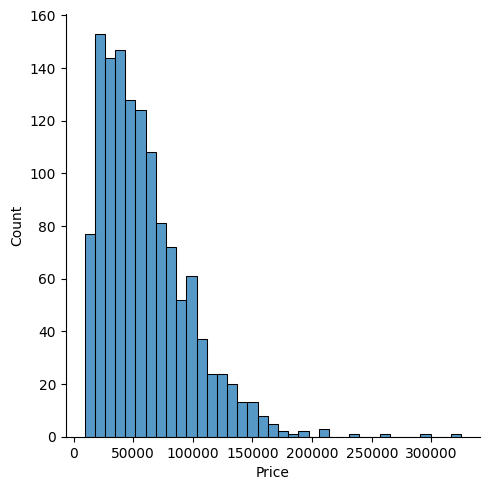

In [119]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

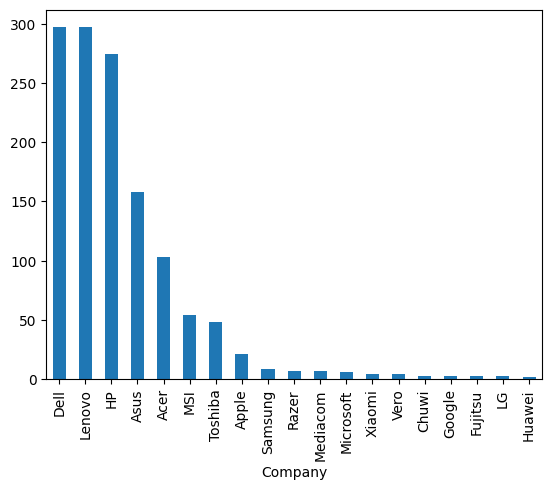

In [120]:
df['Company'].value_counts().plot(kind='bar')

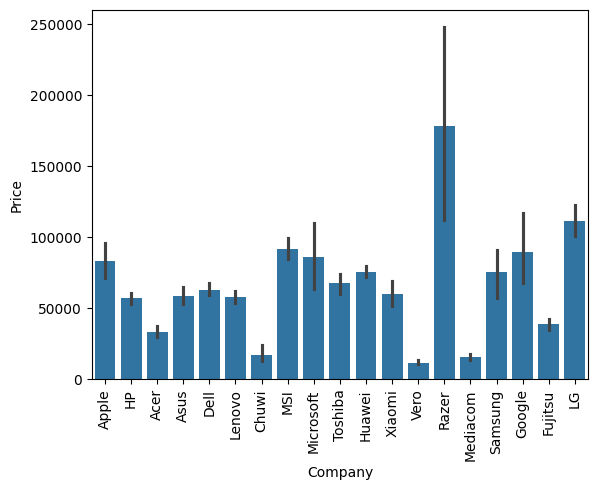

In [121]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

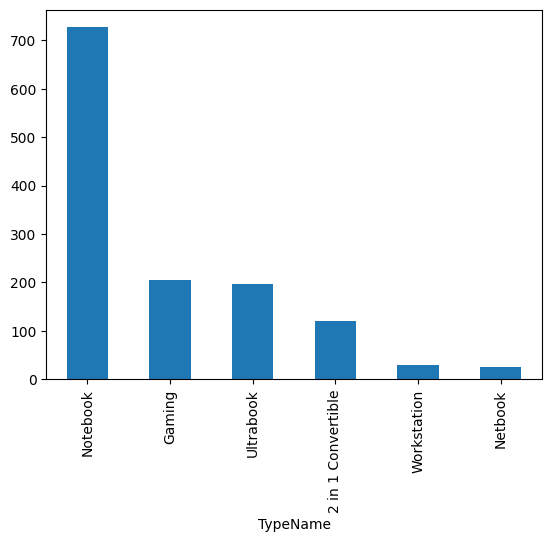

In [122]:
df['TypeName'].value_counts().plot(kind='bar')

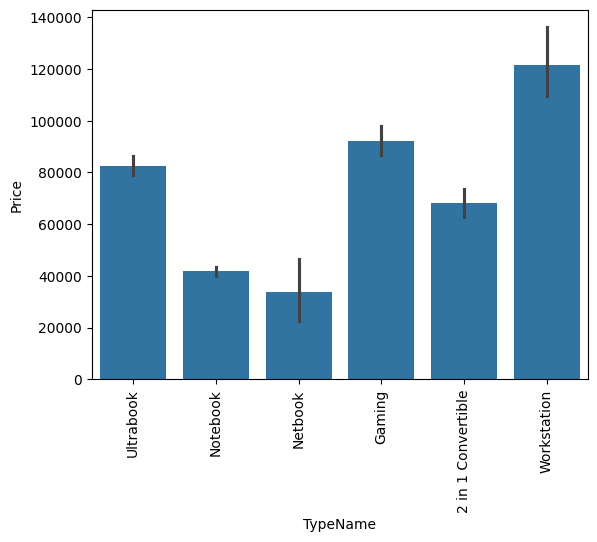

In [123]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

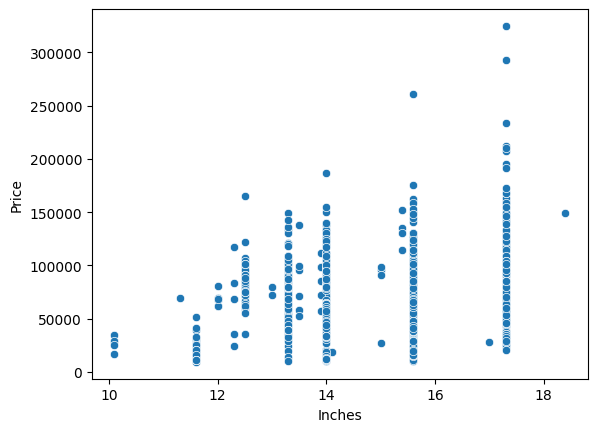

In [124]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [125]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [126]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [127]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,60845.760,0
515,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,13053.600,0
384,Asus,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,93181.392,1
376,Lenovo,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,29463.840,0
1017,Lenovo,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,158135.040,0


<Axes: xlabel='Touchscreen'>

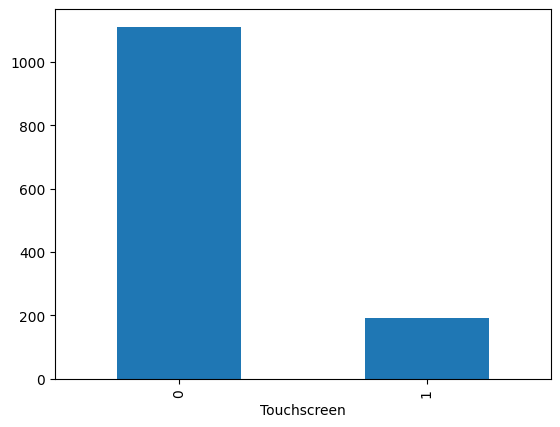

In [128]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

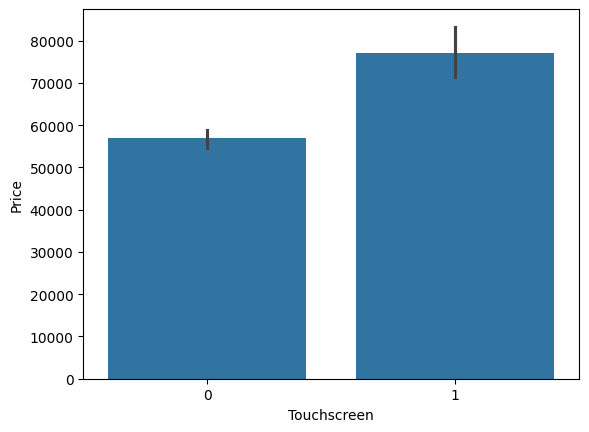

In [129]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [130]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [131]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

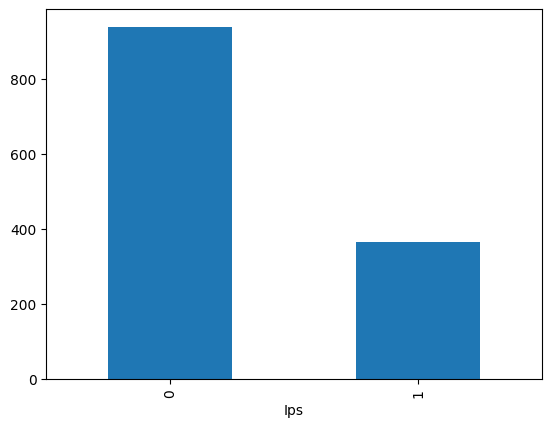

In [132]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

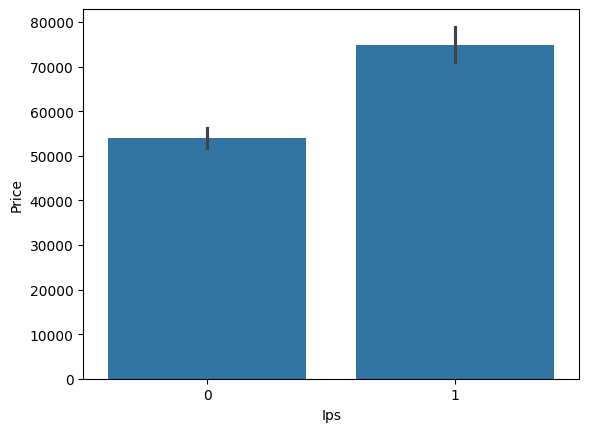

In [133]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [134]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [135]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [136]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
277,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,39693.60,0,1,IPS Panel Full HD 1920,1080
187,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.12,0,1,IPS Panel Full HD 1920,1080
824,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,99900.00,0,1,IPS Panel Full HD 1920,1080
755,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6260U 1.8GHz,8,256GB SSD,Intel HD Graphics 540,Windows 10,1.30,63882.72,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,17742.24,0,0,1366,768


In [137]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [138]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [139]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [141]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [142]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [143]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [144]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [145]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [146]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [147]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [148]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [149]:
def fetch_processor(text):
  if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0]== 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

In [150]:
df['Cpu_brand'] = df['Cpu Name'].apply(fetch_processor)

In [151]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

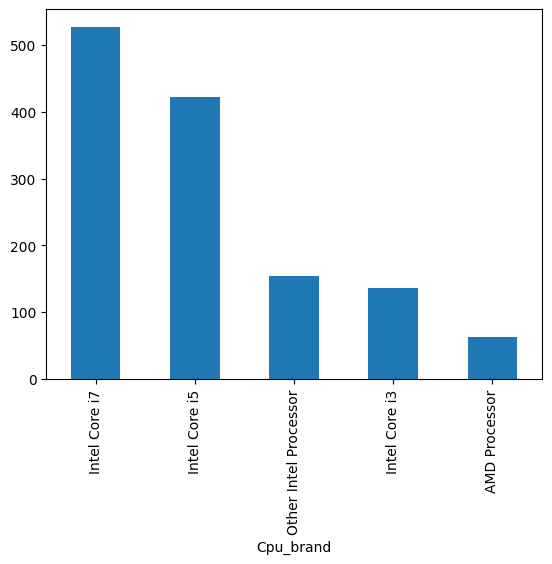

In [153]:
df['Cpu_brand'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

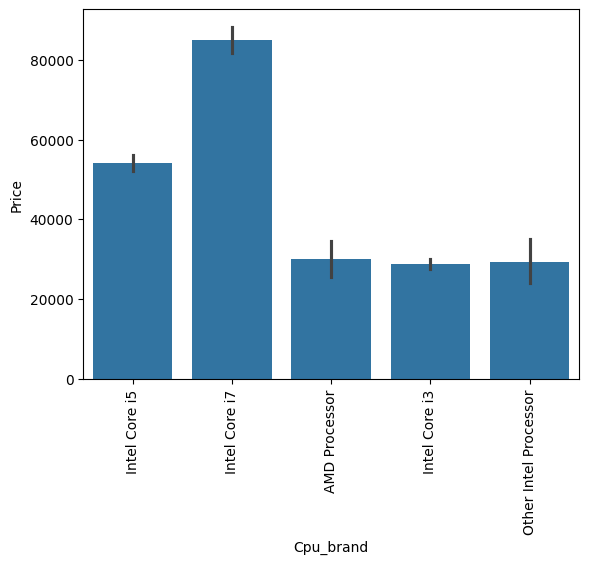

In [154]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')

In [155]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [156]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

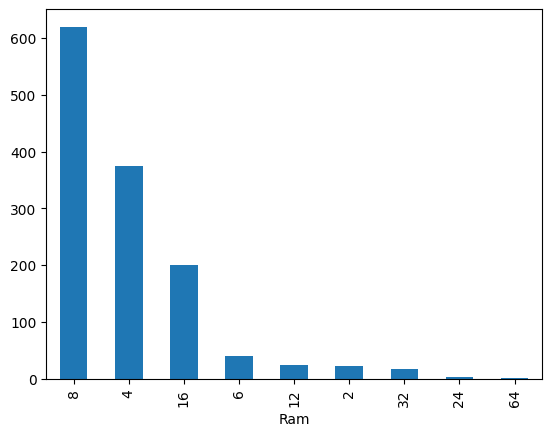

In [157]:
df['Ram'].value_counts().plot(kind='bar')

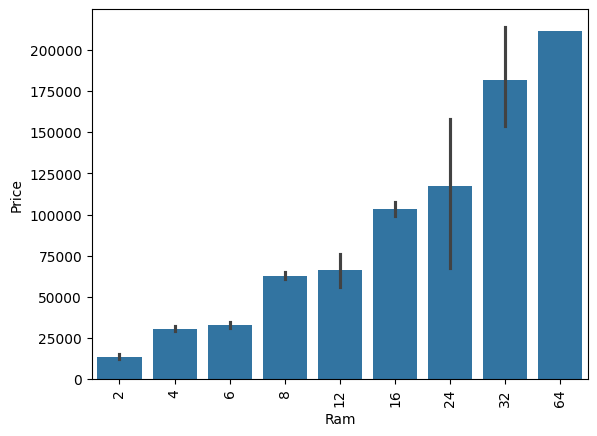

In [158]:
sns.barplot(x = df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [159]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [160]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split('+', n = 1,expand = True)

df['first']=new[0]
df['first']=df['first'].str.strip()

df['second']= new[1]

df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D', '',regex=True)

df['second'].fillna('0', inplace = True)

df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '',regex=True)

df['first'] = pd.to_numeric(df['first'].str.replace(r'\D', ''), errors='coerce').fillna(0).astype(int)
df['second']= df['second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


<ipython-input-160-eeed54980d44>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna('0', inplace = True)


In [161]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [162]:
df.drop(columns=['Memory'],inplace=True)

In [163]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [164]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [165]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [166]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [167]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [168]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [169]:
df['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [170]:
df = df[df['Gpu_brand'] != 'ARM']

In [171]:
df['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180


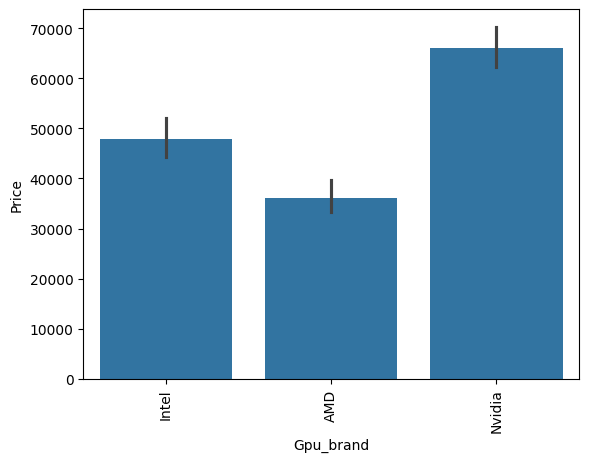

In [172]:
sns.barplot(x = df['Gpu_brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [173]:
df.drop(columns=['Gpu'],inplace=True)

In [174]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [175]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


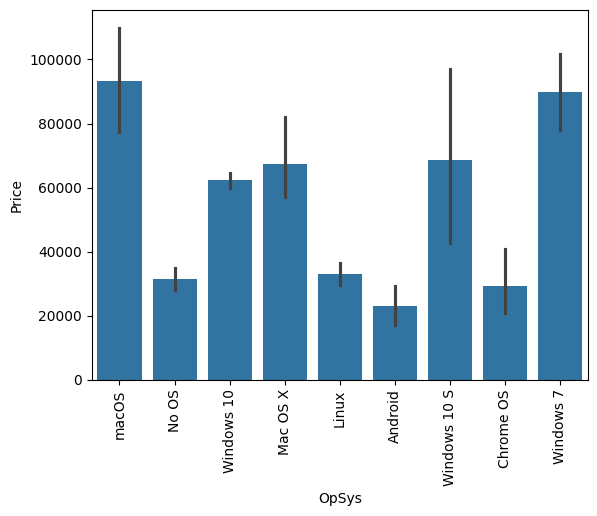

In [176]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [177]:
def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 s':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [178]:
df['os'] = df['OpSys'].apply(cat_os)

In [179]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [180]:
df.drop(columns=['OpSys'],inplace=True)

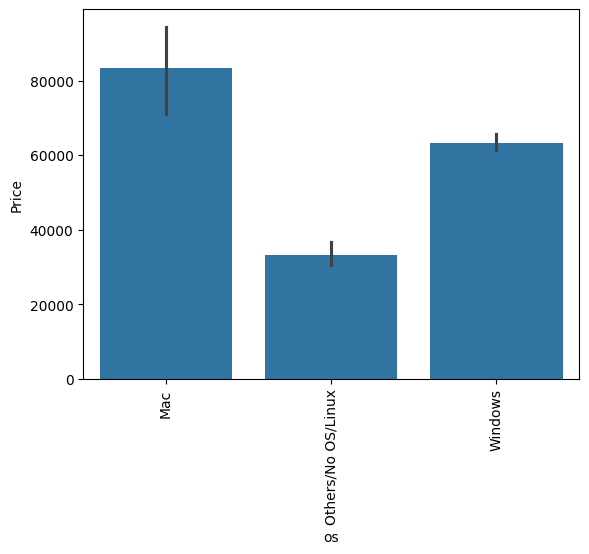

In [181]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

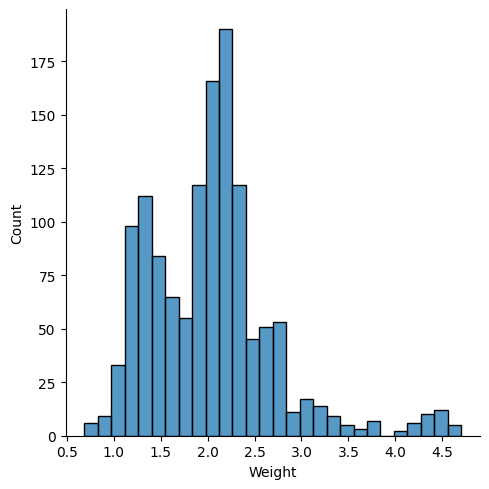

In [182]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

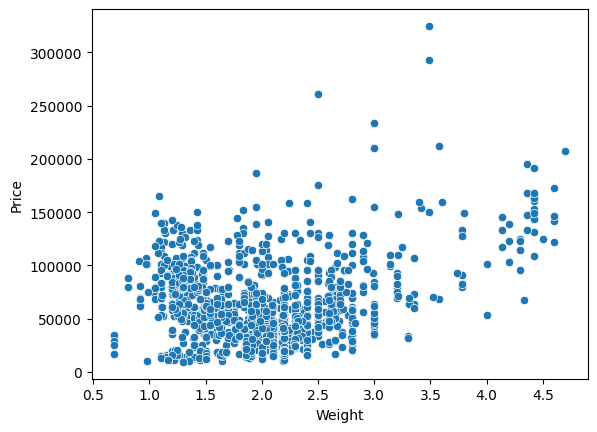

In [183]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: >

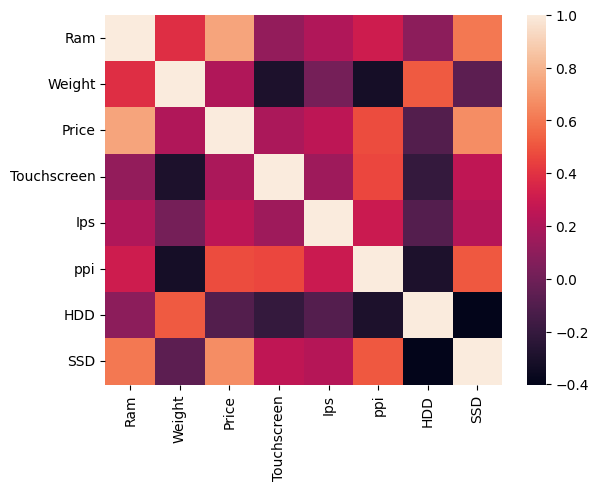

In [184]:
sns.heatmap(df.select_dtypes(include=np.number).corr())

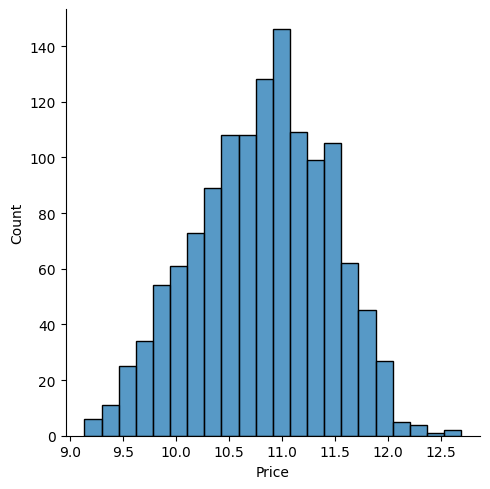

In [185]:
sns.displot(np.log(df['Price']))

In [186]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [187]:
  X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [188]:
Y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [190]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# **Linear Regression**

In [193]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8090039637333746
MAE 0.20909872954695016


# **KNN**

In [194]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8017673664034364
MAE 0.19346118183798544


# **Decision Tree**

In [195]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8377046397616078
MAE 0.18487483915480624


# **SVM**

In [196]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8100211379569278
MAE 0.20156926277165232


# **RandomForest**

In [240]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = RandomForestRegressor(n_estimators=100,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8884779919793211
MAE 0.15865333442325918


# **AdaBoost**

In [198]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.7836492234798201
MAE 0.23577612269445739


# **Gradient Boost**

In [238]:
step1  = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')



step2 = RandomForestRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8878016466290515
MAE 0.15400648057083818


# **Expring the Model**

In [199]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [200]:
!pip install gradio

In [216]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [219]:
import gradio as gr
import streamlit as st
import pickle
import numpy as np
import math

In [220]:
#load your model and data
pipe = pickle.load(open('pipe.pkl','rb'))
df1 = pickle.load(open('df.pkl','rb'))

In [221]:
X_train.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,0,128,Intel,Windows


In [252]:
def predict_price(Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os):
  #ppi=None
  if Touchscreen=='Yes':
    Touchscreen=1
  else:
    Touchscreen=0

  if Ips=='Yes':
    Ips=1
  else:
    Ips=0

  #Resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])
  #X_res = int(Resolution.split('x')[0])
  #Y_res = int(Resolution.split('x')[1])
  #ppi = (((int(X_res)**2) + (int(Y_res)**2))**0.5)/screen_size
  query = np.array([Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os])
  query = query.reshape(1,12)
  price = pipe.predict(query)[0]
  return math.exp(price)


import gradio as gr
# Define the inputs and outputs for the Gradio interface
inputs = [
    gr.Dropdown(choices=df1['Company'].unique().tolist(), label="Company"),
    gr.Dropdown(choices=df1['TypeName'].unique().tolist(), label="TypeName"),
    gr.Dropdown(choices=df1['Ram'].unique().tolist(), label="Ram"),
    gr.Slider(minimum=df1['Weight'].min(), maximum=df1['Weight'].max(), value=df1['Weight'].mean(), label="Weight"),
    gr.Radio(['No','Yes'],label='TouchScreen'),
    gr.Radio(['No','Yes'],label='IPS'),
    gr.Number(label="ppi"),
    gr.Dropdown(choices=df1['Cpu_brand'].unique().tolist(), label="Cpu"),
    gr.Number(label="HDD"),
    gr.Number(label="SSD"),
    gr.Dropdown(choices=df1['Gpu_brand'].unique().tolist(), label="Gpu"),
    gr.Dropdown(choices=df1['os'].unique().tolist(), label="OS")
]

outputs = gr.Textbox(label='Predicted Price')
# Create and launch the Gradio interface
gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, title='Laptop Price Prediction').launch(debug=True)




Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fa090cb13ee34132c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fa090cb13ee34132c4.gradio.live
